In [359]:
import files_process_save as fps
import pathlib
import pandas as pd
import numpy as np
from typing import Union
import seaborn as sns
import matplotlib.pyplot as plt

upload csv file

In [360]:
file_path = fps.check_file("Sludge age and f_m.csv")
df = pd.read_csv(file_path)
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index, dayfirst=True)

Remove out of range values

In [361]:
def check_values_range(df: pd.DataFrame) -> pd.DataFrame:
    """
    Check and replace incorrect values with nan.
    (Zero values or values out of defined ranges)
    """
    df.replace(0, np.nan, inplace=True)
    ranges_lst = [(0.05, 0.6), (0.5, 9)]
    col_names_lst = ["F_M", "Sludge Age"]
    
    for i in range(2):
        name = col_names_lst[i]
        low = ranges_lst[i][0]
        high = ranges_lst[i][1]
        df.loc[:, df.columns.str.contains(name)] = df.loc[
            :, df.columns.str.contains(name)
        ].apply(lambda x: [value if low < value < high else np.nan for value in x])

    return df

In [362]:
df = check_values_range(df)

Interpolate missing data by methode time

In [363]:
df.interpolate(inplace=True, method="time")
df = df.fillna(method='bfill')

Visual data

In [364]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B
Date,,,,
2010-01-01,0.18,0.17,3.78,3.04
2010-01-02,0.18,0.17,3.78,3.04
2010-01-03,0.18,0.17,3.78,3.18
2010-01-04,0.18,0.17,3.40,3.18
2010-01-05,0.23,0.23,3.40,2.70
...,...,...,...,...
2020-09-11,0.26,0.26,3.54,3.37
2020-09-12,0.21,0.22,3.70,3.91
2020-09-13,0.24,0.24,3.60,3.76


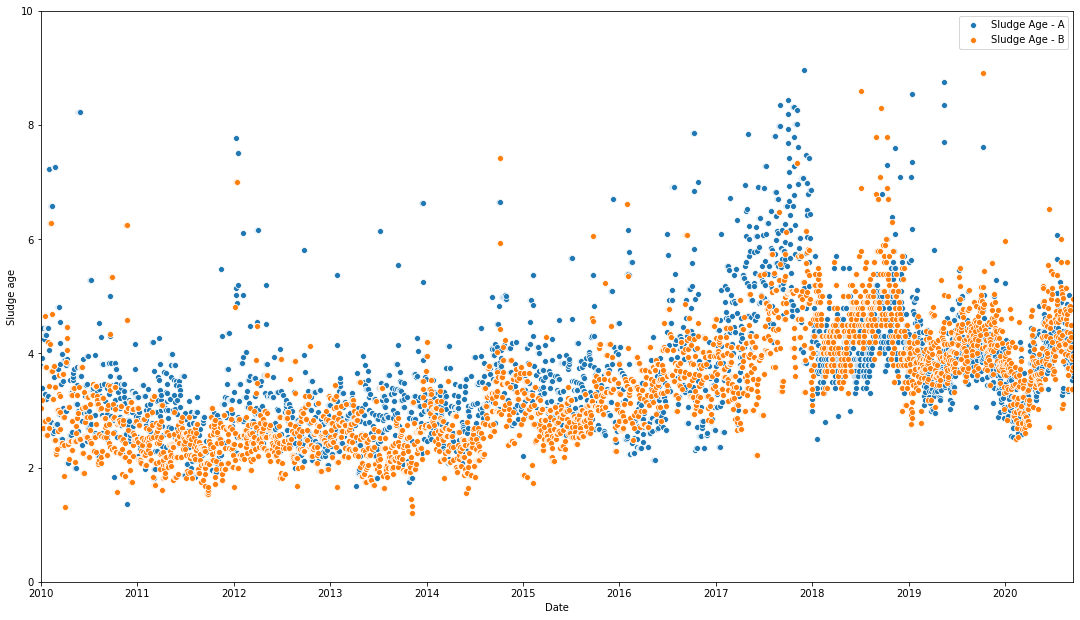

In [365]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - B", ax=ax)
plt.ylabel("Sludge age")
plt.legend(["Sludge Age - A", "Sludge Age - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 10)

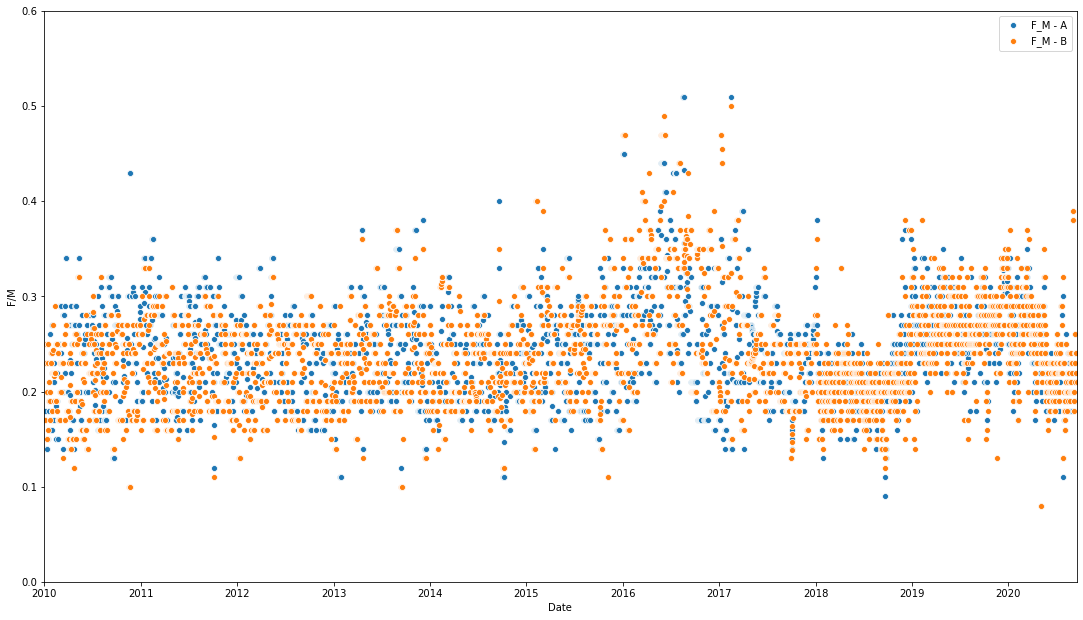

In [366]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="F_M - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="F_M - B", ax=ax)
plt.ylabel("F/M")
plt.legend(["F_M - A", "F_M - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 0.6)

Remove local outliers

In [367]:
def IQR_cal (df: pd.DataFrame):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return IQR, Q1, Q3

In [368]:
for i in range(len(df)):
    window = 10
    jump = 5
    j=i*jump
    if j+window<len(df):
        IQR, Q1, Q3 = IQR_cal(df.iloc[j:j+window,:])
        k=j
        while k<j+window:
            for z in range(4):
                if (df.iloc[k,z] < (Q1[z] - 1 * IQR[z]) or (df.iloc[k,z] > (Q3[z] + 1 * IQR[z]))):
                    df.iloc[k,z] = np.nan
            k=k+1

interpolate and fill values insted of nan

In [369]:
df.interpolate(inplace=True, method="time")
df = df.fillna(method='bfill')

Revisual data

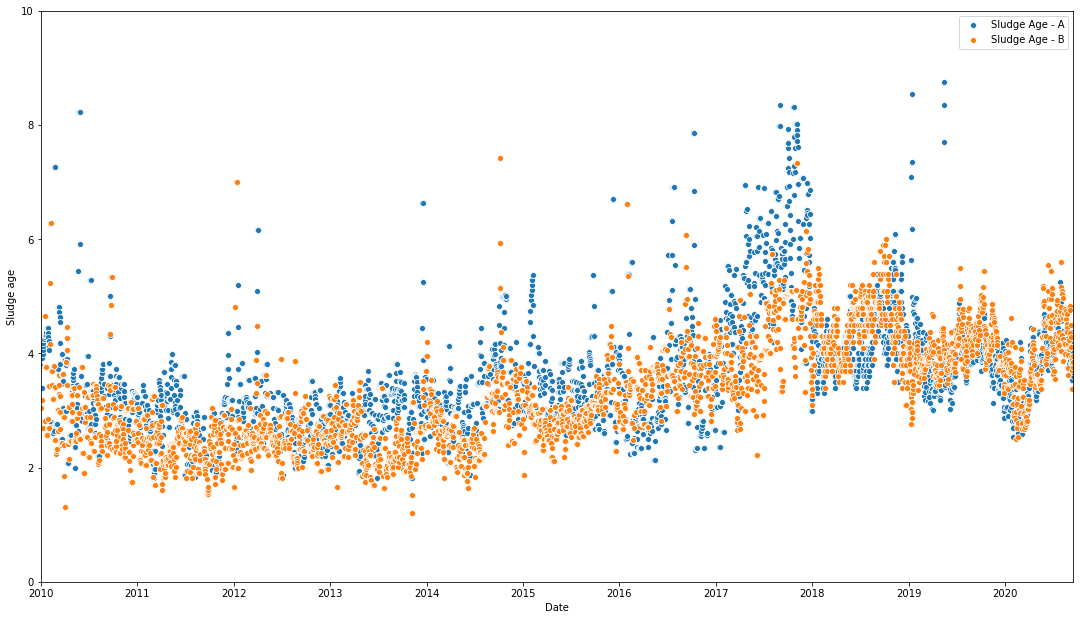

In [370]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="Sludge Age - B", ax=ax)
plt.ylabel("Sludge age")
plt.legend(["Sludge Age - A", "Sludge Age - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 10)

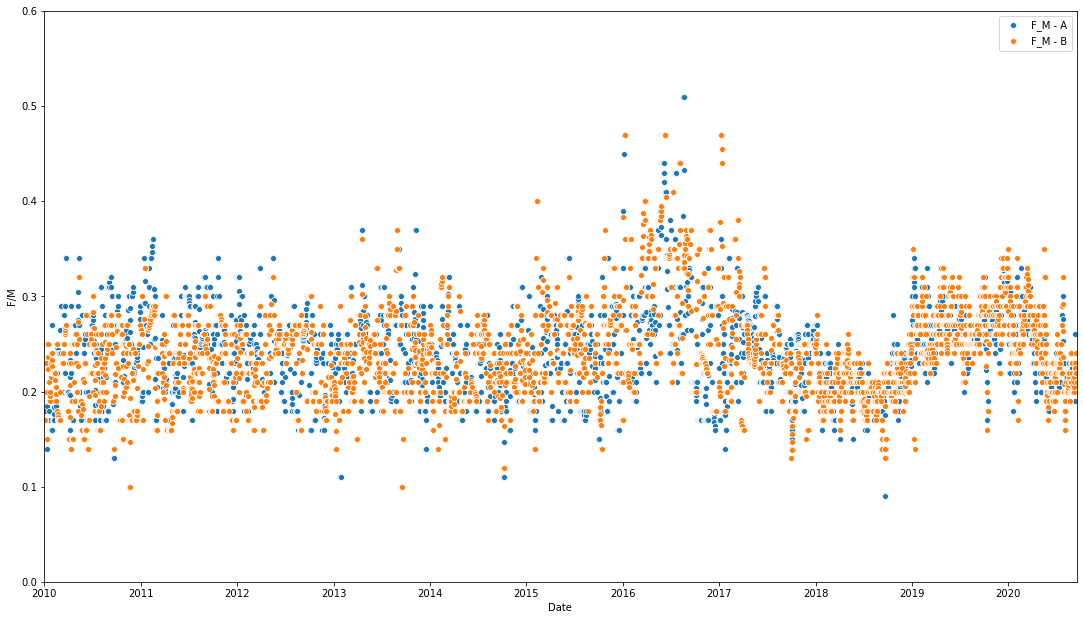

In [371]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
_=sns.scatterplot(data=df, x=df.index, y="F_M - A", ax=ax)
_=sns.scatterplot(data=df, x=df.index, y="F_M - B", ax=ax)
plt.ylabel("F/M")
plt.legend(["F_M - A", "F_M - B"])
plt.xlim(df.index.min(), df.index.max())
_=plt.ylim(0, 0.6)

In [372]:
#df_ma = df.rolling(7, center=True).mean()

In [373]:
#df_ma = df_ma.fillna(method='bfill').fillna(method='ffill')

In [374]:
#df_ma.index.names = ['date']

In [375]:
df = df.round(decimals=2)

In [376]:
#df_ma

In [378]:
df.to_csv(pathlib.Path("clean_tables/sludge_age_f_m.csv"), index=True)

In [393]:
# fig, ax1 = plt.subplots()
# fig.set_size_inches(18.5, 10.5)
# _=sns.scatterplot(data=df, x=df.index, y="Sludge Age - A", ax=ax1)
# ax1.set_ylabel("Sludge age")
# ax1.legend(["Sludge age - A"])
# ax2 = ax1.twinx()
# _=sns.scatterplot(data=df, x=df.index, y="F_M - A", ax=ax2, color = 'tab:red')
# ax2.set_ylabel("F_M - A")
# ax2.legend(["F/M - A"])
# plt.xlim(df.index.min(), df.index.max())

In [354]:
df['Month'] = pd.DatetimeIndex(df.index).month
df['Year'] = pd.DatetimeIndex(df.index).year
df['F_M'] = df.iloc[:, np.r_[0: 2]].mean(axis=1)
df['Sludge_age'] = df.iloc[:, np.r_[2: 4]].mean(axis=1)

In [355]:
df

,F_M - A,F_M - B,Sludge Age - A,Sludge Age - B,Month,Year,F_M,Sludge_age
Date,,,,,,,,
2010-01-01,0.18,0.170,3.78,3.040,1,2010,0.1750,3.4100
2010-01-02,0.18,0.170,3.78,3.040,1,2010,0.1750,3.4100
2010-01-03,0.18,0.170,3.78,3.180,1,2010,0.1750,3.4800
2010-01-04,0.18,0.170,3.40,3.180,1,2010,0.1750,3.2900
2010-01-05,0.23,0.230,3.40,2.700,1,2010,0.2300,3.0500
...,...,...,...,...,...,...,...,...
2020-09-11,0.26,0.225,3.54,3.370,9,2020,0.2425,3.4550
2020-09-12,0.21,0.220,3.70,3.910,9,2020,0.2150,3.8050
2020-09-13,0.24,0.240,3.60,3.760,9,2020,0.2400,3.6800


Text(0.5, 1.0, 'F_M')

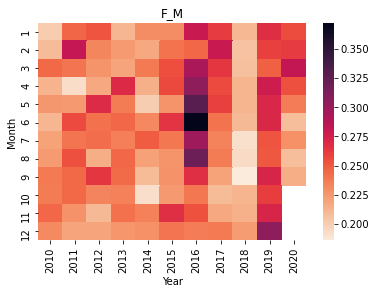

In [356]:
table = pd.pivot_table(df, values=df.columns[6], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(df.columns[6])

Text(0.5, 1.0, 'Sludge_age')

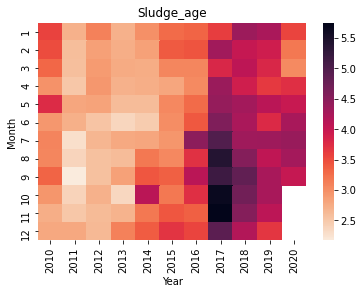

In [357]:
table = pd.pivot_table(df, values=df.columns[7], index=['Month'], columns=['Year'])
ax = sns.heatmap(table, cmap="rocket_r")
plt.title(df.columns[7])